# Dataset Generation

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

## Templates
we have 39 kinds of templates for 4 languages, but we only use 'de' and 'en' here for testing.

In [3]:
# templates
templates = pd.read_json("data/templates.json")
init_uttr_updated = pd.read_csv("data/InitUtterance_list_updated.csv")
templates_updated = templates.merge(init_uttr_updated, on='id')
templates_updated = templates_updated[['id', 'de', 'en']] #'fr', 'it',
templates_updated.head()

,id,de,en
0,MyCloud.OpenArea.Init.Utterance,{'texts': [{'ttsText': '{MyCloudArea} auf #myC...,{'texts': [{'ttsText': 'show {MyCloudArea} on ...
1,Router.SwitchOnWiFi.Init.Utterance,"{'texts': [{'ttsText': 'aktiviere das Wlan'}, ...","{'texts': [{'ttsText': 'activate the Wi-Fi'}, ..."
2,Tv.GenericExitToTv.Init.Utterance,{'texts': [{'ttsText': 'gehe zurück zum Fernse...,"{'texts': [{'ttsText': 'back to TV'}, {'ttsTex..."
3,Router.SwitchOffWiFi.Init.Utterance,{'texts': [{'ttsText': 'deaktiviere das Wlan'}...,{'texts': [{'ttsText': 'can you please switch ...
4,Tv.RadioChannelChange.Init.Utterance,{'texts': [{'ttsText': 'auf Radio {RadioChanne...,{'texts': [{'ttsText': 'can you turn on radio ...


In [4]:
templates_updated.describe()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'
Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1653, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


TypeError: unhashable type: 'dict'

,id,de,en
count,39,39,39
unique,39,39,39
top,Bluewin.NewsSummary.Init.Utterance,{'texts': [{'ttsText': '{SmartHomeSceneName} S...,{'texts': [{'ttsText': 'activate {SmartHomeSce...
freq,1,1,1


## Entities
65K entities of 33 different types are included.
1/3 of them are from German environment.

In [5]:
# entities
entities = pd.read_json("data/entities.json")
entities = entities[['value', 'type', 'language', 'normalizedValue', 'aliases']]
entities.head()

,value,type,language,normalizedValue,aliases
0,Widnau,LocalsearchLocation,de,widnau,[]
1,Zurigo,LocalsearchLocation,it,zurigo,[]
2,Solothurn,LocalsearchLocation,de,solothurn,[]
3,Muttenz,LocalsearchLocation,de,muttenz,[]
4,Lyss,LocalsearchLocation,de,lyss,[]


In [6]:
entities.describe()

,value,type,language,normalizedValue,aliases
count,65471,65471,65471,65471,65471
unique,51272,33,4,52082,3793
top,Golf,SeriesName,de,golf,[]
freq,20,17913,22746,20,59649


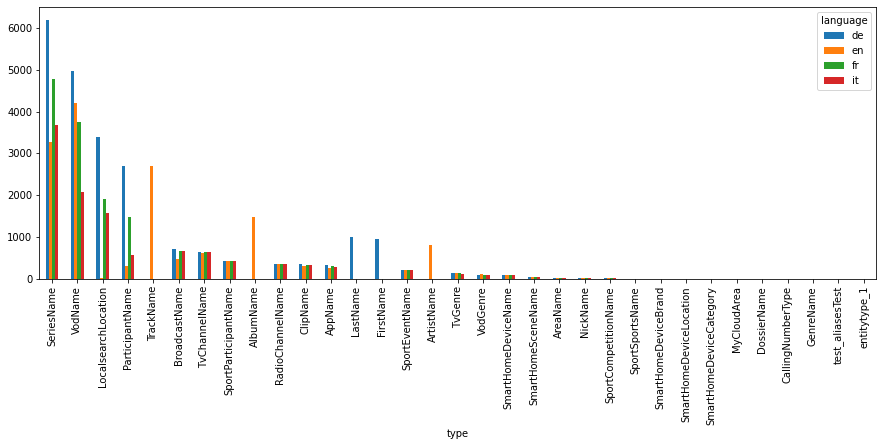

In [4]:
df = entities[['type', 'language']]
df = df.groupby(['type','language']).size().reset_index(name='count')
df2 = df.pivot(index='type', columns='language', values='count')
df2['sum'] = 0
df2 = df2.fillna(0)
for lang in ['de', 'en', 'fr', 'it',]:
    df2['sum'] += df2[lang]
# df.sort_values('count', ascending=False)
p = df2.sort_values('sum', ascending=False)[['de', 'en', 'fr', 'it']].plot(kind='bar', figsize=(15, 5))

## Entities_meta

In [5]:
# entities
entities_meta = pd.read_json("data/entities_meta.json").sort_index()
entities_meta.head()


,value,type,language,normalizedValue,aliases
0,Widnau,LocalsearchLocation,de,widnau,[]
1,Zurigo,LocalsearchLocation,it,zurigo,[]
2,Solothurn,LocalsearchLocation,de,solothurn,[]
3,Muttenz,LocalsearchLocation,de,muttenz,[]
4,Lyss,LocalsearchLocation,de,lyss,[]


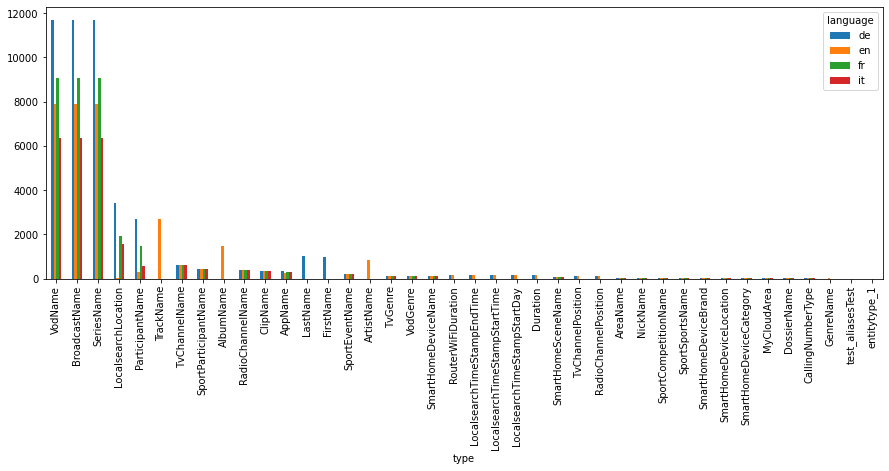

In [7]:
df = entities_meta[['type', 'language']]
df = df.groupby(['type','language']).size().reset_index(name='count')
df2 = df.pivot(index='type', columns='language', values='count')
df2['sum'] = 0
df2 = df2.fillna(0)
for lang in ['de', 'en', 'fr', 'it',]:
    df2['sum'] += df2[lang]
# df.sort_values('count', ascending=False)
p = df2.sort_values('sum', ascending=False)[['de', 'en', 'fr', 'it']].plot(kind='bar', figsize=(15, 5))


### Find the representative
One entity usually has various name, thus, to improve speed, we need to find the representative ones that could retrieve all.
Considering the speaking speed and noise of ASR, we decide to:
1. Combine abbreviation as a upper case word (s r f, S R F -> SRF)
2. Keep the uppercase one if two words spell same (Schweiz, schweiz -> Schweiz)

In [5]:
# TODO: deal with case "a"
from generator.tools import filter_aliases
sample_aliases1 = [
    "TF 3",         # value
    "TF three",     # normalized
    "T F 3",        # alias
    "t f three",    # alias
    "t f 3"         # alias
    ]
filter_aliases(sample_aliases1,'en')

['TF 3']

In [6]:
sample_aliases2 = [
    "S R F",
    "s r f",
    "SRF",

    "SRF 1",
    "S R F 1",
    "s r f eins",
    "SRF eins",
    "SRF einz",
    "S R F einz",
    "S R F eis",
    "s r f eis",
    "s r f einz",
    "SRF eis",

    "D R S",
    "D R S 1",
    "DRS",
    "d r s",
    "DRS 1",
    "d r s eins",
    "DRS eins",

    "schweizer",
    "Schweizer",
    "Schweiz 1",
    "schweiz eins"
	]
filter_aliases(sample_aliases2, 'de')




['Schweizer',
 'SRF',
 'SRF eis',
 'SRF einz',
 'DRS',
 'Schweiz 1',
 'SRF 1',
 'DRS 1',
 'SR']

## Read custom template
For time related templates:
* Localsearch.TemperatureInfo.Init.Utterance
* Localsearch.RainInfo.Init.Utterance
* Localsearch.WeatherInfo.Init.Utterance

exist problem that they use "TimeStamp" to represent both clock time (3 o'clock) and day time ("tomorrow", "Monday", etc.)
But their use cases are different. So we updated general "TimeStamp" -> "TimeStampDay" and "TimeStampTime" for DE and EN

In [8]:
# update template
df = pd.read_json("data/timestamp_de_noted.json")
templates_updated.update(df)

df = pd.read_json("data/timestamp_en_noted.json")
templates_updated.update(df)

## Generation

In [13]:
from generator.module import Generator
gen = Generator(templates=templates_updated, entities=entities_meta, method='one')

t = gen.get_command(target_id='SmartHome.SwitchOnDevice.Init.Utterance',
                target_lang='en',
                 verbose=True)

Choose template: 
	['can you turn on the {SmartHomeDeviceBrand} in the {SmartHomeDeviceLocation}']
After tag removal: 
	[('can you turn on the gigasets in the kids room', '{Template} {Template} {Template} {Template} {Template} {SmartHomeDeviceBrand} {Template} {Template} {SmartHomeDeviceLocation} {SmartHomeDeviceLocation}')]


In [15]:
from tqdm import tqdm
sample_num = 10
sample_df = pd.DataFrame(columns=['id', 'command_de','label_de', 'command_en', 'label_en'])
ind = 0
for temp_id in tqdm(templates_updated.id):
    for _ in range(sample_num):
        command_de, label_de = gen.get_command(target_id=temp_id, target_lang='de', verbose=False)[0]
        command_en, label_en = gen.get_command(target_id=temp_id, target_lang='en', verbose=False)[0]
        sample_df.loc[ind] = [temp_id, command_de, label_de, command_en, label_en]
        ind += 1
sample_df

100%|██████████| 39/39 [01:41<00:00,  2.61s/it]


,id,command_de,label_de,command_en,label_en
0,MyCloud.OpenArea.Init.Utterance,kannst du letzten über myCloud öffnen,{Template} {Template} {MyCloudArea} {Template}...,please go to my shots on myCloud,{Template} {Template} {Template} {MyCloudArea}...
1,MyCloud.OpenArea.Init.Utterance,kann ich bitte kurz Bilder Galerie auf myCloud...,{Template} {Template} {Template} {Template} {M...,can you please show me my shots on myCloud,{Template} {Template} {Template} {Template} {T...
2,MyCloud.OpenArea.Init.Utterance,Favorit auf myCloud anzeigen,{MyCloudArea} {Template} {Template} {Template},go to photo album on myCloud,{Template} {Template} {MyCloudArea} {MyCloudAr...
3,MyCloud.OpenArea.Init.Utterance,zeigst du mir bitte Bilder Alben bei myCloud an,{Template} {Template} {Template} {Template} {M...,open myCloud and go to favourites,{Template} {Template} {Template} {Template} {T...
4,MyCloud.OpenArea.Init.Utterance,Bilder Alben auf myCloud anzeigen,{MyCloudArea} {MyCloudArea} {Template} {Templa...,could you please open marked photos with myCloud,{Template} {Template} {Template} {Template} {M...
...,...,...,...,...,...
385,Tv.WatchNextEpisode.Init.Utterance,die nächste Episode wiedergeben bitte,{Template} {Template} {Template} {Template} {T...,next episode,{Template} {Template}
386,Tv.WatchNextEpisode.Init.Utterance,eine Folge geht noch,{Template} {Template} {Template} {Template},continue with the next episode,{Template} {Template} {Template} {Template} {T...
387,Tv.WatchNextEpisode.Init.Utterance,eine weitere Folge bitte,{Template} {Template} {Template} {Template},next episode,{Template} {Template}
388,Tv.WatchNextEpisode.Init.Utterance,spiele die nächste Folge ab,{Template} {Template} {Template} {Template} {T...,can you play the next episode,{Template} {Template} {Template} {Template} {T...


In [23]:
sample_df.to_csv("data/sample.csv", encoding='utf-8-sig')

## Test tools

In [20]:
miss_id = ['Localsearch.TemperatureInfo.Init.Utterance' ,
            'Localsearch.RainInfo.Init.Utterance',
            'Localsearch.WeatherInfo.Init.Utterance' ]

k  = templates_updated[[t in miss_id for t in templates_updated.id]]
k[['id', 'de']].to_json("data/timestamp_de.json")
k[['id', 'en']].to_json("data/timestamp_en.json")


In [23]:
from generator.normalizer import Normalizer
Normalizer().normalize_text("ProCreate", 'en')



'procreate'